In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import pickle 
import numpy as np
import pandas as pd
import torch
import os
from timeit import default_timer as timer

In [3]:
from core.GraphConvNet2 import GraphConvNet2
from core.DataEmbeddingGraph import DataEmbeddingGraph

In [4]:
if torch.cuda.is_available():
    print('cuda available')
    device = 'cuda'
else:
    print('cuda not available')
    device = 'cpu'

cuda not available


In [5]:
net_parameters = {}
net_parameters['n_components'] = 2
net_parameters['D'] = 784 # input dimension
net_parameters['H'] = 50 # number of hidden units
net_parameters['L'] = 10 # number of hidden layers
net_parameters['n_channels'] = 1
net_parameters['n_units_1'] = net_parameters['n_units_2'] = net_parameters['H']

# Graph net
net = GraphConvNet2(net_parameters)
if torch.cuda.is_available(): net.cuda()
root = 'results/mnist_preprocessed_tsne1/'
filename = root + 'graph_net5.pkl'
checkpoint = torch.load(filename, map_location=device)
net.load_state_dict(checkpoint['state_dict'])

In [6]:
import util.usps_data_loader as usps
from util.draw_random_subset import draw_random_subset

In [7]:
parent_dir = os.path.abspath('..')
data_dir = parent_dir + '/data/usps/'
usps_test = usps.get_test_set(data_dir, augment=False)

In [8]:
inputs, labels = draw_random_subset(usps_test, 1000)

In [9]:
inputs.shape

torch.Size([1000, 1, 28, 28])

In [10]:
G = DataEmbeddingGraph(inputs, labels)

In [11]:
# Net
if torch.cuda.is_available():   
    y_pred = net.forward(G).cpu().detach().numpy()
else:    
    y_pred = net.forward(G).detach().numpy()

In [12]:
labels = [int(l) for l in labels]
named_labels = []

In [14]:
from util.plot_embedding import plot_embedding_subplot

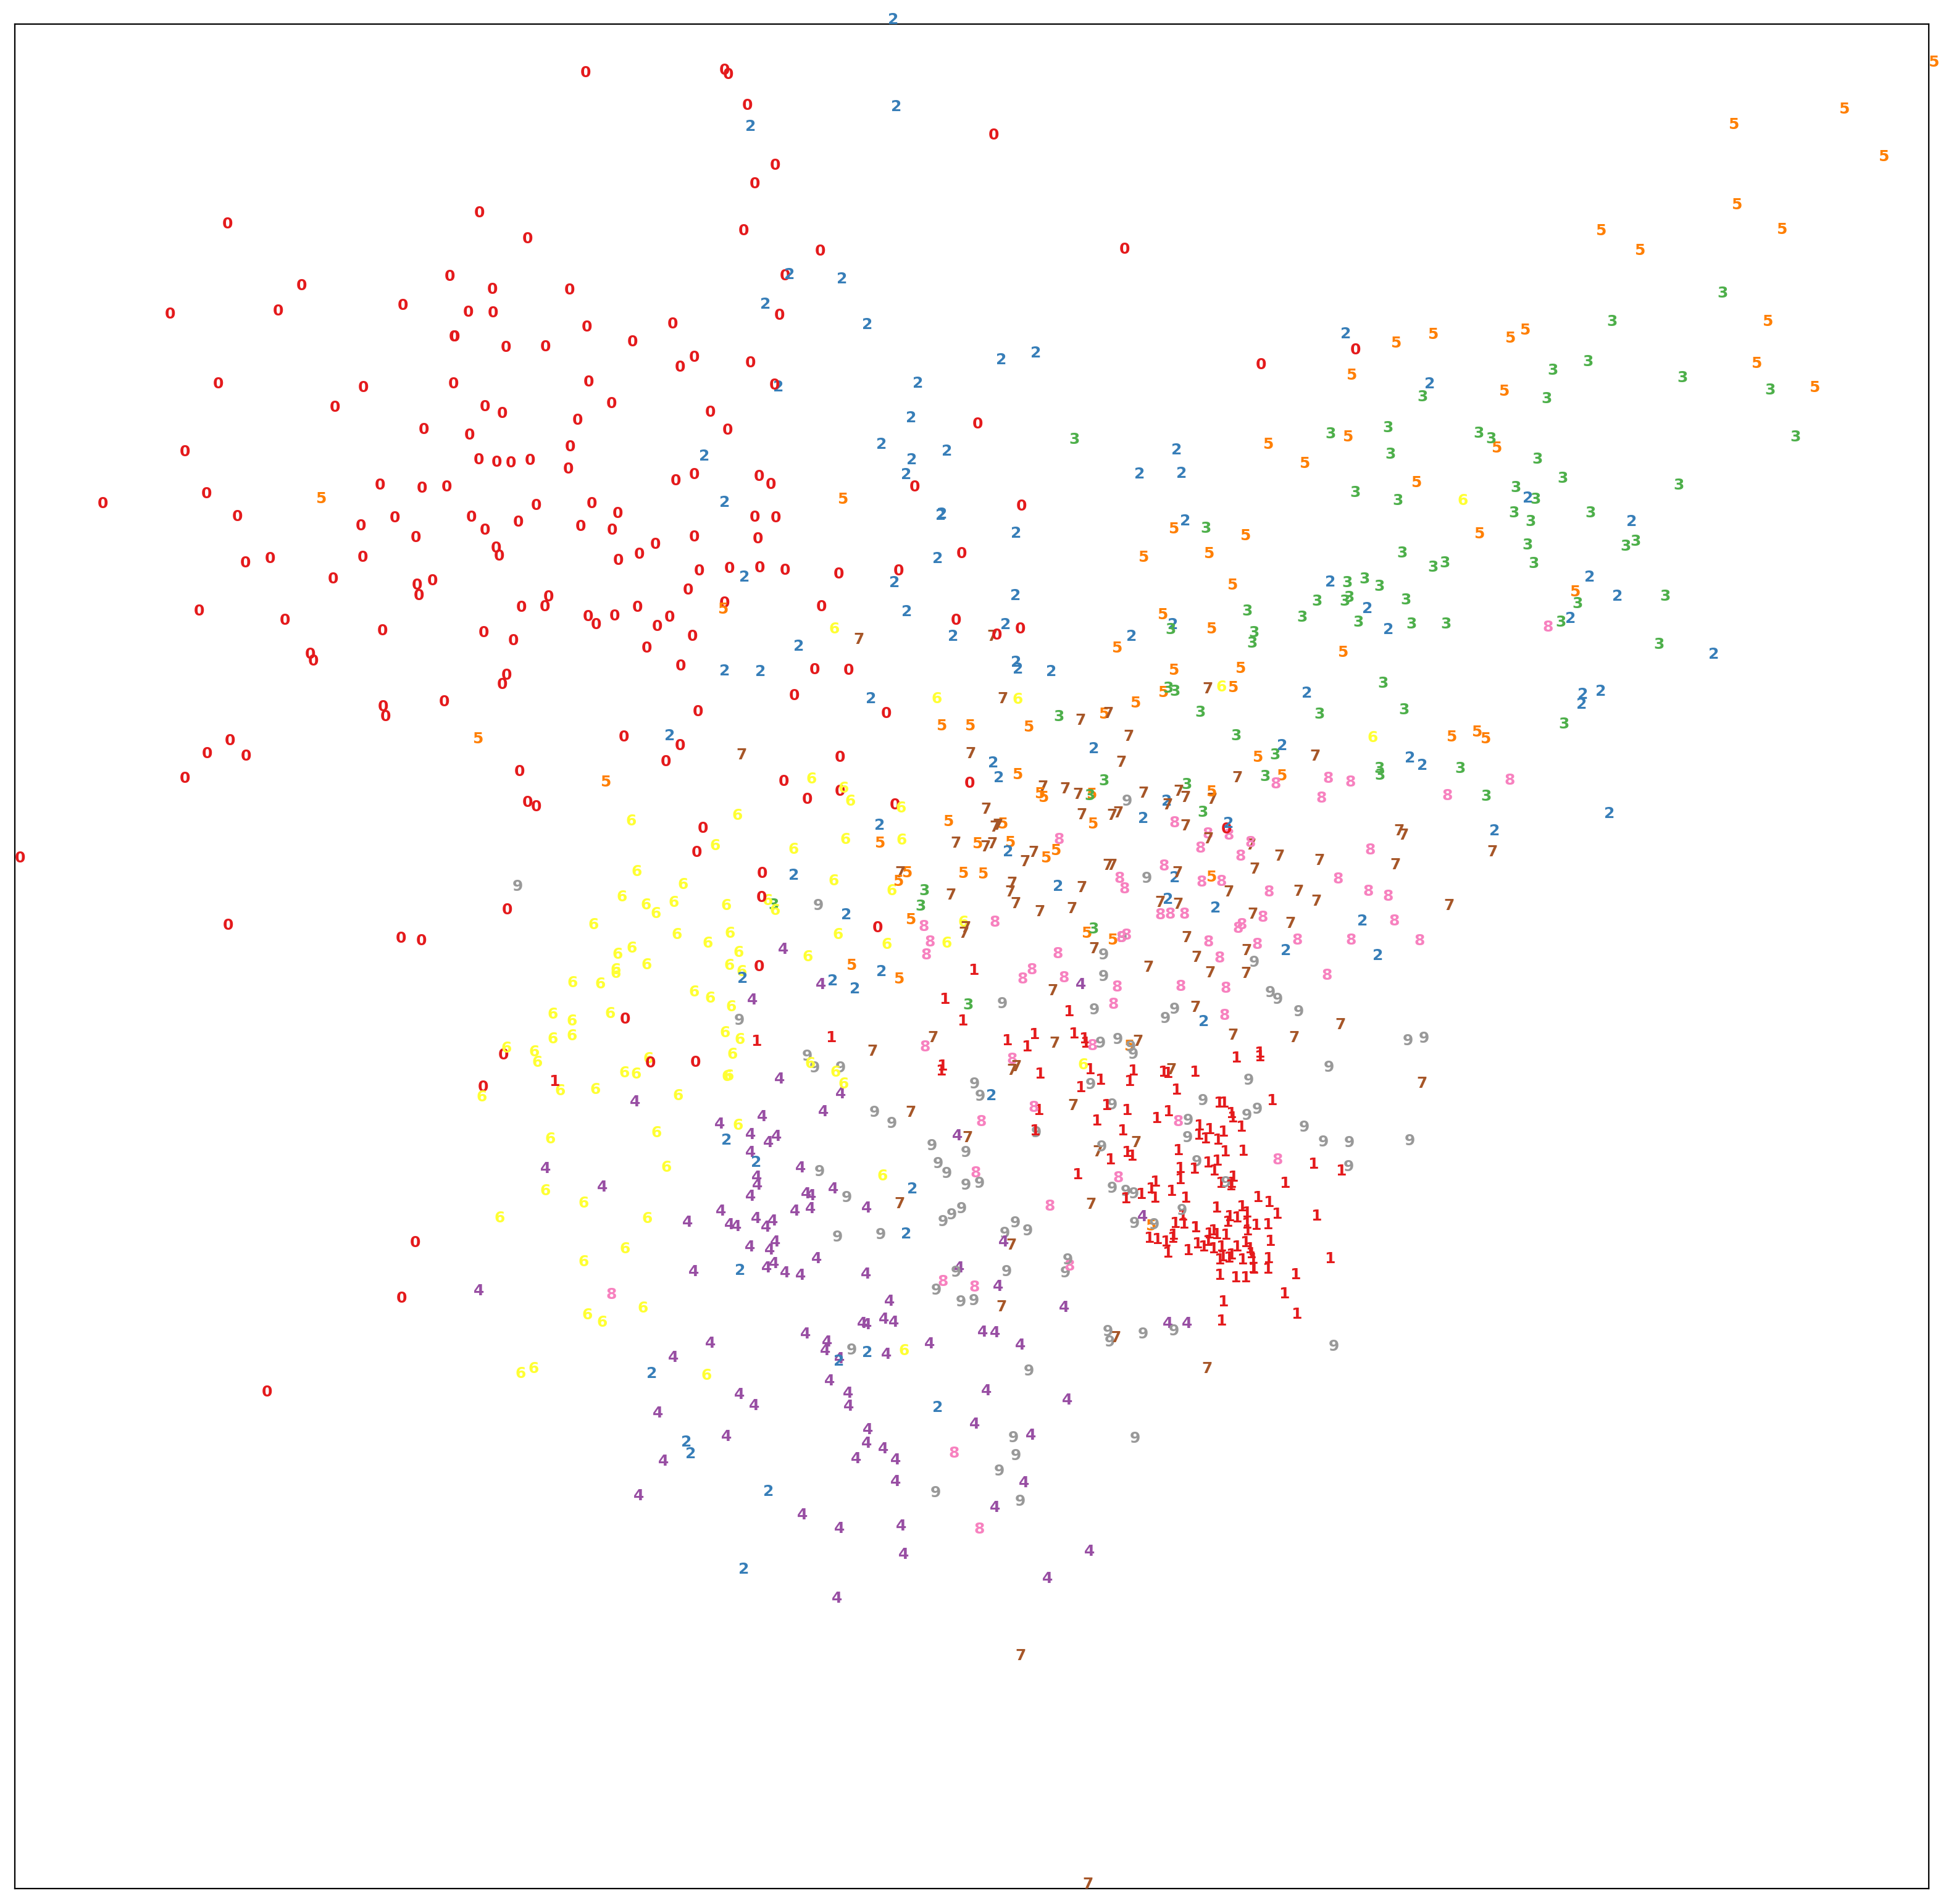

In [15]:
f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,20), dpi=200)
plot_embedding_subplot(ax, y_pred, labels)